* [Bike Sharing Demand | Kaggle](https://www.kaggle.com/competitions/bike-sharing-demand)

## Data Fields
```
datetime - hourly date + timestamp
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
submission= pd.read_csv("sampleSubmission.csv")

In [3]:
display(train.shape)
display(train.head())

(10886, 12)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
* 연, 월, 일, 시, 분, 초 만들기

#### 날짜, 시간 문자열을 datetime으로 변환

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train["datetime"]=pd.to_datetime(train["datetime"])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
import datetime as dt

In [7]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


#### test데이터 날짜, 시간 문자열을 datetime으로 변환

In [9]:
test["datetime"]=pd.to_datetime(test["datetime"])
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["hour"]=test["datetime"].dt.hour
test["minute"]=test["datetime"].dt.minute
test["second"]=test["datetime"].dt.second

## EDA

In [10]:
#결측치 확인
display(train.isnull().sum())
display(test.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B71017588>,
      dtype=object)

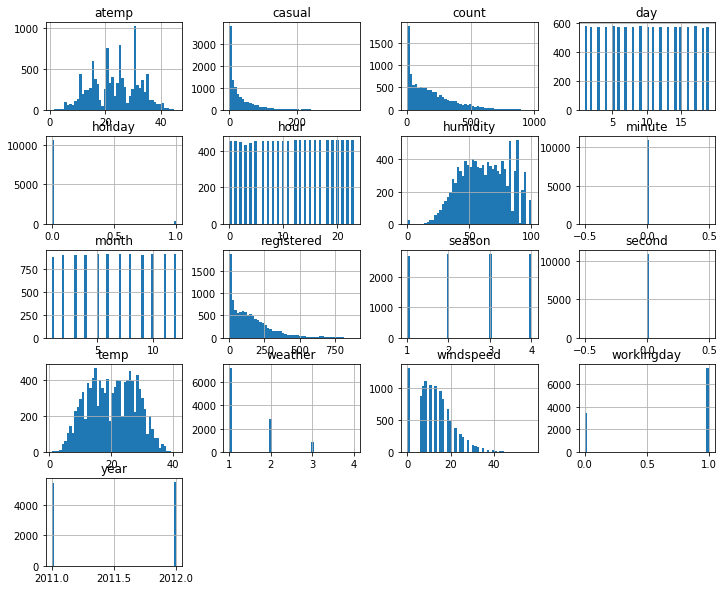

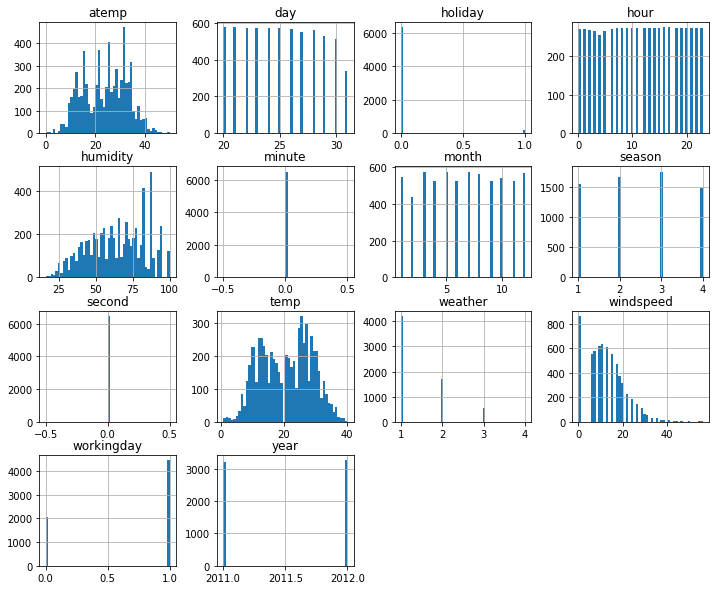

In [11]:
train.hist(figsize=(12,10), bins=50)
test.hist(figsize=(12,10), bins=50)

In [12]:
#풍속 0인 날짜(이상치) 체크
train[train["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,0
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,0


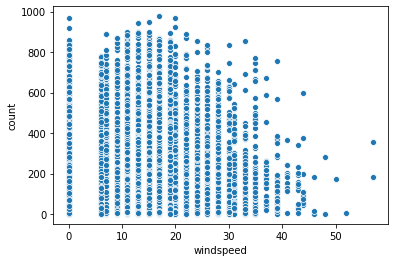

In [13]:
# 풍속과 자전거 대여 상관 관계 시각화
sns.scatterplot(data=train, x="windspeed", y="count")

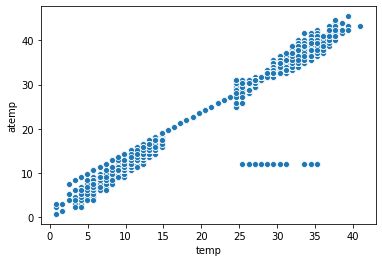

In [14]:
sns.scatterplot(data=train, x="temp", y="atemp")

In [15]:
train[(train["temp"]>20)&(train["temp"]<40) & (train["atemp"]<15) & (train["atemp"]>5)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012,8,17,0,0,0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012,8,17,1,0,0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012,8,17,2,0,0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012,8,17,3,0,0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012,8,17,4,0,0
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36,2012,8,17,5,0,0
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,151,157,2012,8,17,6,0,0
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,368,379,2012,8,17,7,0,0
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668,2012,8,17,8,0,0
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,320,378,2012,8,17,9,0,0


## 학습, 예측 데이터셋 만들기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">


* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

* submit
    * sample_submission file을 불러옵니다.
    * 예측한 값을 옮겨 적습니다.
    * 캐글에 제출합니다.

In [16]:
# label_name : 정답값
label_name = 'count'

In [17]:
# feature_names : 학습, 예측에 사용할 컬럼명(변수)
feature_names= train.columns.tolist()
feature_names.remove(label_name)

In [18]:
feature_names.remove("datetime")
feature_names.remove("casual")
feature_names.remove("registered")

In [19]:
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

In [20]:
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제


X_train= train[feature_names]
X_train.head()
X_train.shape

(10886, 14)

In [21]:
# 예측 데이터셋, 예) 실전 시험 문제
X_test=test[feature_names]
print(X_test.shape)

(6493, 14)


In [22]:
# 학습(훈련)에 사용할 정답값 예) 기출문제의 정답
y_train=train[label_name]
print(y_train.shape)

(10886,)


## 머신러닝 알고리즘

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### 모델 성능 측정

In [25]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [26]:
# rmse 측정
train_predict = model.predict(X_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )

RMSE':15.730481304536951


## 교차검증
<img src="https://i.imgur.com/CSrSEig.png">

In [27]:
# 모의고사를 풀어서 답을 구하는 과정과 유사합니다.

from sklearn.model_selection import cross_val_predict
y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5)

## 평가
### MAE(Mean Absolute Error)
```
MAE
- 모델의 예측값과 실제 값 차이의 절대값 평균
- 절대값을 취하기 때문에 가장 직관적임
```


In [28]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_predict, y_train)
#print("MAE':{}".format(mean_absolute_error(train_predict, y_train)))
print("MAE':{}".format(mean_absolute_error(y_train,y_valid_predict)))

MAE':50.40957652030131


### MSE(Mean Squared Error)
```

MSE
- 모델의 예측값과 실제값 차이의 면적의(제곱)합
- 제곱을 하기 때문에 특이치에 민감하다.
```

In [29]:
# mean_squared_error
from sklearn.metrics import mean_squared_error 
#print("MSE':{}".format(mean_squared_error(train_predict, y_train)))
print("MSE':{}".format(mean_squared_error(y_train,y_valid_predict )))

MSE':5757.867926979607


### RMSE(Root Mean Squared Error)

```
RMSE
- MSE에 루트를 씌운 값
- RMSE를 사용하면 지표를 실제 값과 유사한 단위로 다시 변환하는 것이기 때문에 MSE보다 해석이 더 쉽다.
- MAE보다 특이치에 Robust(강하다)
```

In [30]:
#print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
print("RMSE':{}".format(math.sqrt(mean_squared_error(y_train,y_valid_predict))) )

RMSE':75.88061627965081


### RMSLE(Root Mean Squared Logarithmic Error)


<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="300">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.


* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8) :  e를 밑으로 하는 로그
* [자연로그의 밑 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8%EC%9D%98_%EB%B0%91)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8) : 10진 로그 혹은 밑이 10인 로그

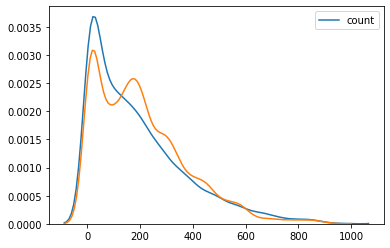

In [31]:
sns.kdeplot(y_train)
sns.kdeplot(y_valid_predict)

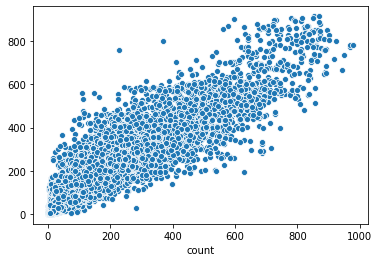

In [32]:
sns.scatterplot(x=y_train, y=y_valid_predict)

In [33]:
from sklearn.metrics import mean_squared_log_error

RMSLE = mean_squared_log_error(y_train, y_valid_predict)**0.5

print("RMSLE':{}".format(mean_squared_log_error(y_train,y_valid_predict)**0.5))

RMSLE':0.5200652012443514


## 학습과 예측

In [34]:
y_predict =  model.fit(X_train, y_train).predict(X_test)
y_predict[:10]

array([ 11.86,   5.87,   5.52,   3.52,   3.01,   8.04,  35.26,  86.32,
       184.48, 114.85])

In [35]:
import seaborn as sns

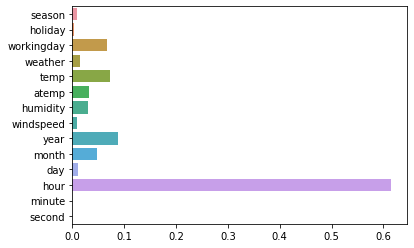

In [37]:
# 피처의 중요도
sns.barplot(x=model.feature_importances_, y=feature_names)

## 제출
* https://www.kaggle.com/competitions/bike-sharing-demand/submit

In [38]:
# 답안지 양식을 불러옵니다.
submission.head(2)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0


In [47]:
submission["count"] = y_predict

In [48]:
submission.to_csv("submit_0.62007.csv", index=False)

In [49]:
pd.read_csv("submit_0.62007.csv").head()

,datetime,count
0,2011-01-20 00:00:00,11.86
1,2011-01-20 01:00:00,5.87
2,2011-01-20 02:00:00,5.52
3,2011-01-20 03:00:00,3.52
4,2011-01-20 04:00:00,3.01
